# Propagación de la afinidad

In [5]:
import numpy as np
import matplotlib.pyplot as plt

from itertools import cycle
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets import make_blobs

In [30]:
centers = [[1,1], [-1,-1], [1, -1], [-1, 1]]
X, labels = make_blobs(n_samples=800, centers = centers, cluster_std = 0.25, random_state = 0)

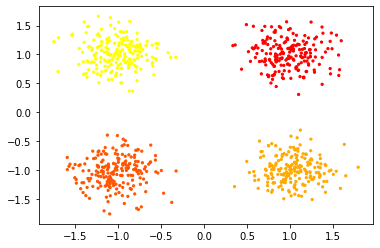

In [33]:
plt.scatter(X[:,0], X[:,1], c = labels, cmap = 'autumn', s = 5)
plt.show()

In [35]:
af = AffinityPropagation(preference=-50, random_state=0).fit(X)

/home/mauricio/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_affinity_propagation.py:246: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  warnings.warn("Affinity propagation did not converge, this model "


In [36]:
cluster_centers_ids = af.cluster_centers_indices_

In [18]:
cluster_labels = af.labels_

In [34]:
n_clust = len(cluster_centers_ids)
n_clust

3

In [39]:
def report_affinity_propagation(X):
    af = AffinityPropagation(preference=-50, random_state=0, max_iter= 1000, damping=0.9).fit(X)
    cluster_centers_ids = af.cluster_centers_indices_
    n_clust = len(cluster_centers_ids)
    cluster_labels = af.labels_
    
    print("Número estimado de clusters: %d"%n_clust)
    print("Homogeneidad: %0.3f"%metrics.homogeneity_score(labels, cluster_labels))
    print("Completitud: %0.3f"%metrics.completeness_score(labels, cluster_labels))
    print("V-measure: %0.3f"%metrics.v_measure_score(labels, cluster_labels))
    print("R2 ajustado: %0.3f"%metrics.adjusted_rand_score(labels, cluster_labels))
    print("Información mútua ajustada: %0.3f"%metrics.adjusted_mutual_info_score(labels, cluster_labels))
    print("Coeficiente de la silueta: %0.3f"%metrics.silhouette_score(X, labels, metric = "euclidean"))
    
    plt.figure(figsize=(16,9))
    plt.clf()
    
    colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk")
    for k, col in zip(range(n_clust), colors):
        class_members = (cluster_labels == k)
        clust_center  = X[cluster_centers_ids[k]]
        plt.plot(X[class_members,0], X[class_members, 1], col + ".")
        plt.plot(clust_center[0], clust_center[1], 'o', markerfacecolor = col, markeredgecolor = 'k', markersize = 14)
        for x in X[class_members]:
            plt.plot([clust_center[0], x[0]], [clust_center[1], x[1]], col)
    plt.title("Número de clusters: %d"%n_clust)
    plt.show()

Número estimado de clusters: 4
Homogeneidad: 1.000
Completitud: 1.000
V-measure: 1.000
R2 ajustado: 1.000
Información mútua ajustada: 1.000
Coeficiente de la silueta: 0.769


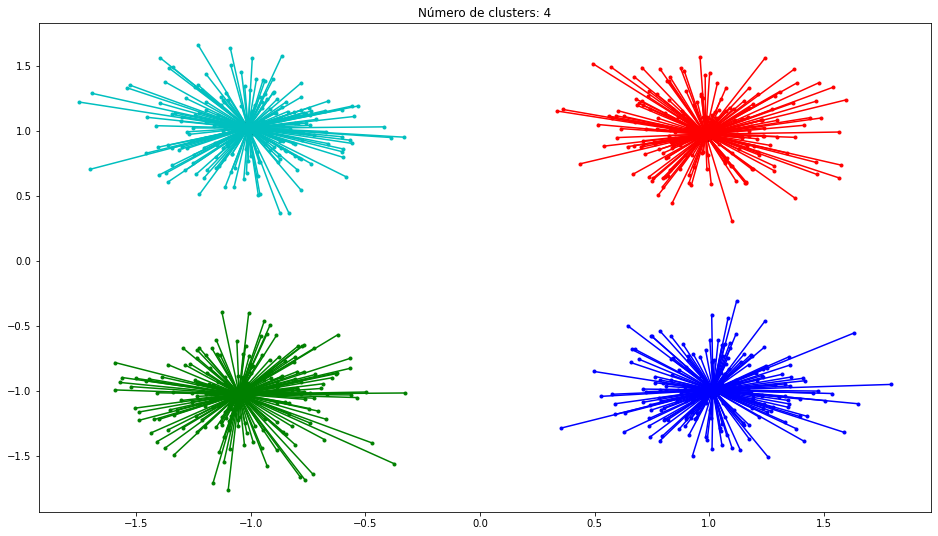

In [40]:
report_affinity_propagation(X)